In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
sns.set()

### We would like to predict the price of the used car depending upon its specifications:<br>
The process is as folows:
1. **Loading the data and see what's inside the data.**
2. **Preprocessing the data as the data is not clean!**
  <br>2.1 Determining the variables of interest.
  <br>2.2 Checking the missing values.
  <br>2.3 Dropping of the missing vlaues.
  <br>2.4 Plotting their PDF's.
5. **OLS Assumptions.**
4. **Preprocessing the Categorical Data using Dummy Variables.**
5. **Defining the dependent and independent variable**
6. **Standardizing the values**
7. **Splitting the data into train and test**
8. **Creating Regression**
9. **Plotting Regression**
10. **Testing for test data**

In [2]:
raw_data = pd.read_csv(r"C:\Users\anktr\Downloads\1.04. Real-life example.csv")

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing: 
  Getting its Descriptive Statistics as below:

In [4]:
raw_data.describe(include= 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Data Cleaning:

In [5]:
# Determing the variable of interest:
# We do so by using drop method in pandas:
# Remember axis zero means rows and axis one means columns:
data = raw_data.drop(['Model'],axis= 1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


 #### Missing Variables: 

In [6]:
# To deal with the missing values: we use insnull method on 'data'.
# This will give a dataframe of whether a datapoint is null or not!
# Since True = data is missing and False = data is not missing 
# And to sum up: we use sum method on isnull method:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
# Dropping all missing values: 
# Rule of thumb: "If you are removing <5% of the observations, you are free to just remove all that have missing values"
# Removing them... [The observations]:
data_no_mv = data.dropna(axis= 0)

In [8]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring PDF's: 

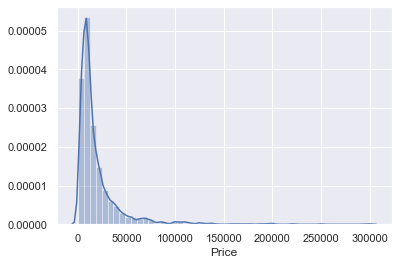

In [9]:
# The PDF will show how the data is distributed.
# Makes easy to spot the outliers and the anomalies.
# We wil plot the PDF with seaborn:
# For optimal results we would be looking for 'Normal Distribution'.
sns.distplot(data_no_mv['Price'])
# Price, here is exponential so we put it in our PDF.

### Dealing with the outliers:


In [10]:
# To deal with outliers, we can do so by removing 0.5% or 1% of the problematic samples.
# From our PDF we see the outliers are on the high price's side.
# We can do this by using quantile method.
q = data_no_mv['Price'].quantile(0.99)
# Now we create a new df with the condition of prices must be bolow the 99th percentile of the 'Price' variable.
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


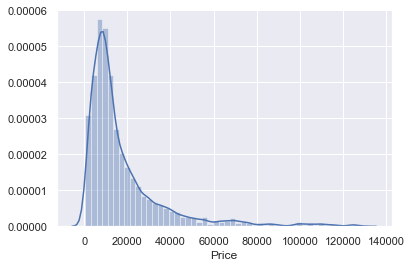

In [11]:
# Checking the PDF again:
sns.distplot(data_1['Price'])

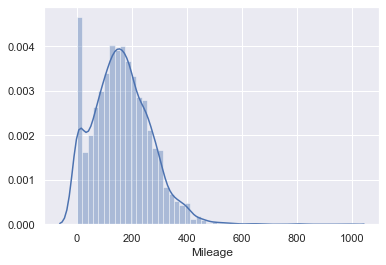

In [12]:
# Treating the 'Mileage' variable:
sns.distplot(data_no_mv['Mileage'])

In [13]:
# Now, treating the other variables:
# Performing same precedure as with the variable: 'Price'.
# This time with mileage:
q =data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


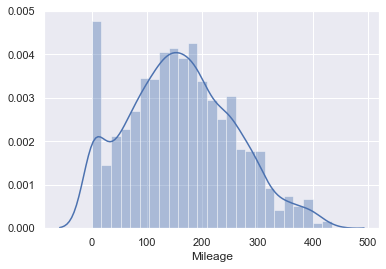

In [14]:
sns.distplot(data_2['Mileage'])

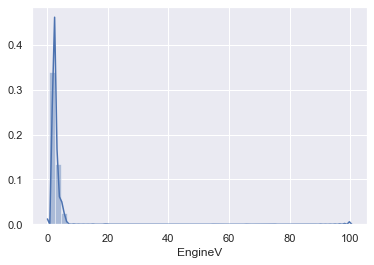

In [15]:
# Now with the variable Engine V:
sns.distplot(data_no_mv['EngineV'])

In [16]:
# As we know that Car engines volumes are usually/always below 6.5l!
data_3 = data_2[data_2['EngineV']<6.5]

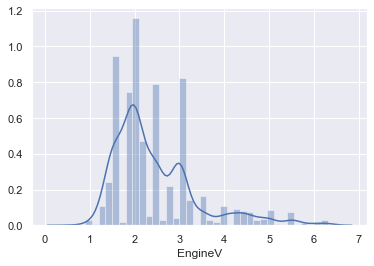

In [17]:
# Now plotting the PDF again: 
sns.distplot(data_3['EngineV'])

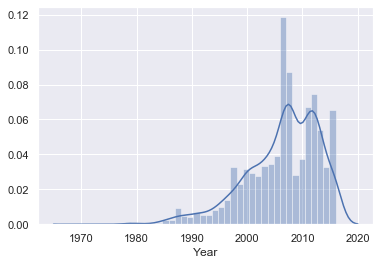

In [18]:
# Now with the variable: year:
# plotting its PDF:
sns.distplot(data_no_mv['Year'])

In [19]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

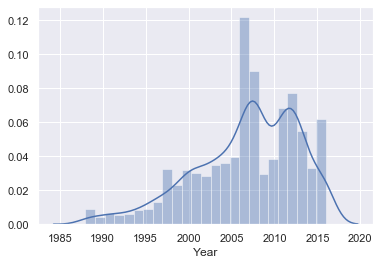

In [20]:
sns.distplot(data_4['Year'])

In [21]:
#As we drop some observations, so we must reset the indeces once again using reset_index method and set drop = TRUE:
data_cleaned = data_4.reset_index(drop= True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [22]:
# Again checking the Descriptive Statistics:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


 We have deleted ~250 obsrvations that were the problematic ones.

# OLS Assumptions.

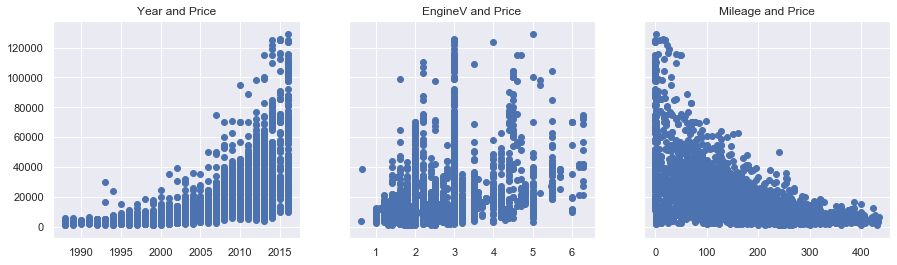

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True ,figsize=(15, 4))
# This line of code plots the three graphs side by side so we can compare them 
# 'Price' is the y-axis for all the plots.
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title("Year and Price")
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('EngineV and Price')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Mileage and Price')
plt.show()

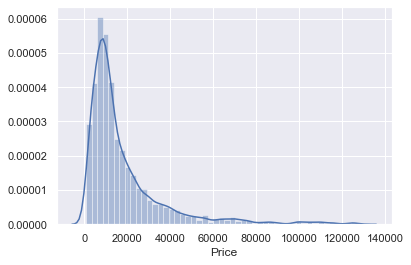

In [24]:
# From the above plots we see how Price is exponentially distributed, not normally distributed! 
# Since we should not perform linear regression, so we must transform them:
sns.distplot(data_cleaned['Price'])

In [25]:
# Transforming the Variables:
log_price = np.log(data_cleaned['Price'])
# Adding the transformed variable into our dataset:
data_cleaned['Log Price']= log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


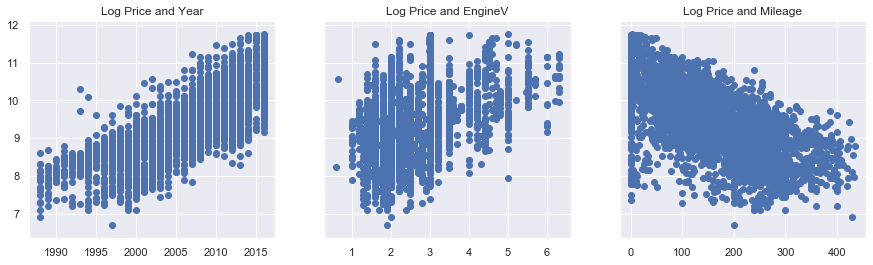

In [26]:
# Plotting scatter plots:
f,(ax1,ax2,ax3) = plt.subplots(1,3 ,sharey=True,figsize=(15,4))
ax1.scatter(data_cleaned['Year'],data_cleaned['Log Price'])
ax1.set_title("Log Price and Year")
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Log Price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Log Price'])
ax3.set_title('Log Price and Mileage')
plt.show()

In [27]:
# Since we longer needed the orignal 'Price' variable so we drop it:
data_cleaned.drop(['Price'], axis= 1)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


### Multicollinearity:

In [28]:
# Checking the columns of our dataframe:
data_cleaned.columns.values


array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log Price'], dtype=object)

In [29]:
# To check the multicollinearity we use satsmodels as sklearn doesn't have any built-in way!
from statsmodels.stats.outliers_influence import variance_inflation_factor
# We will check multicollinearity on our numerical ones:
variables = data_cleaned[['Mileage','Year','EngineV']]
# Creating a dataframe:
vif = pd.DataFrame()
# here we make use of the variance_inflation_factor, which will basically output the respective VIFs
vif['VIF'] = [variance_inflation_factor(variables.values, i)for i in range(variables.shape[1])]
vif['Featues'] = variables.columns

In [30]:
vif
# when vif =1 there is no multicollinearity.
 # Generally values b/w 1 and 5 are considered perfectly OK.

,VIF,Featues
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [31]:
# Since we see in our output 'year' has the highest VIF so we must remove it from the model.
data_no_multicollinearity = data_cleaned.drop(['Year'], axis =1)
data_no_multicollinearity

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,8.779557


# Preprocessing of the categorical data:

In [32]:
# Now we use categorical data:
# We use the dummy-variables:
# for this, we have a method called: get_dummies()
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first =True)

In [33]:
data_with_dummies

,Price,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,11500.0,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,17900.0,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,125000.0,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,6500.0,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### Rearranging:

In [34]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [35]:
# We see the columns of our dataframe:
cols = ['Log Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [36]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
preprocessed_data = data_with_dummies[cols]
preprocessed_data.head()

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regression Model: 

In [37]:
# Declaring the target:
target = preprocessed_data['Log Price']
# Declaring the input:
inputs = preprocessed_data.drop('Log Price',axis=1)

In [38]:
# Scaling the data: 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Fitting the inputs:
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
# Standardizing the variables:
input_scaled = scaler.transform(inputs)

### Train Test Split: 

In [40]:
from sklearn.model_selection import train_test_split
# Splitting the variables with 80-20 split and some random_state:
x_train, x_test, y_train, y_test=  train_test_split(input_scaled, target, test_size=0.2, random_state = 365)

## Creating Regression:

In [41]:
reg = LinearRegression()
# Fitting the data:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
yhat = reg.predict(x_train)
# cheking the output of the regression...

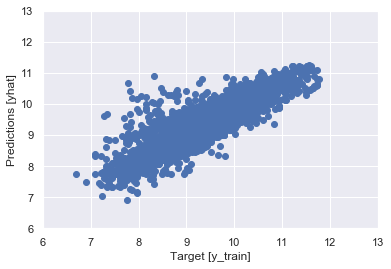

In [43]:
plt.scatter(y_train, yhat)
# Closer the points better the prediction.
plt.xlabel('Target [y_train]')
plt.ylabel('Predictions [yhat]')
# To plot a 45-degree line: 
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

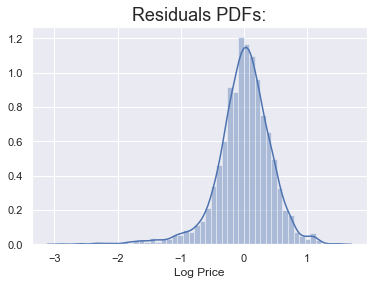

In [44]:
# Residual plot:
# Difference b/w the targets and the predictions:
sns.distplot(y_train - yhat)
plt.title('Residuals PDFs:',size=18)
plt.show()
# In the best case, this plot should be normally distributed:
# Our graph shows that there are negative residuals: [Far away from the mean!]

In [45]:
# Finding the R-Squared:
reg.score(x_train, y_train)
# Below shows our model is explaining 75% variability of our data.

0.744996578792662

In [46]:
# Finding the bias: Intercept,
reg.intercept_

9.415239458021299

In [47]:
# Finding the weights: coefficients,
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [48]:
# Creating the Regression Summary: 
reg_summary= pd.DataFrame(inputs.columns.values,columns= ['Features'])
reg_summary['Weights'] = reg.coef_ 
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


 ## **Weights interpretion:**
 ####  1. Positive weight shows that  as a feature increases in value, so 'Log Price'and 'Price' respectively.
 ####  2. Negative weight shows that as a feature in value, 'Log Price' and 'Price' decreases.
 

In [49]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Weight Interpretation for Dummies: 
1-> **A positive weight shows that the respective category (Brand) is more expensive than  the benchmark[AUDI]**<br>
2-> **A negative weight shows that the respective category (Brand) is less expensive than the benchmark[AUDI]**

# Testing: 

In [50]:
# Testing is done on a dataset the algorithm has ever seen
# In our case:
# 1. Test inputs = 'x_test' and,
# Outputs = 'y_test'
y_hat_test = reg.predict(x_test)

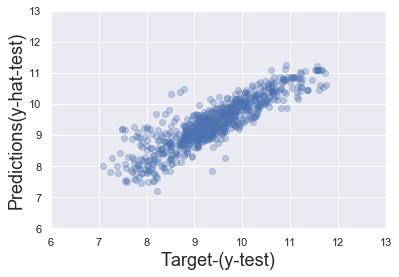

In [51]:
# PLoting a scatter plot on test tergets and predictions.
plt.scatter(y_test,y_hat_test ,alpha=0.3)
plt.xlabel('Target-(y-test)',size =18)
plt.ylabel('Predictions(y-hat-test)', size=18)
# lim method to get a 45-degree line:
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [52]:
# Since Prices are not in their original forms, they are in their log transform, so to obtain the original we use exp method :
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])
df_pf

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075
...,...
769,29651.726363
770,10732.071179
771,13922.446953
772,27487.751303


In [54]:
df_pf.mean()

Predictions    15946.760167
dtype: float64